### Training a binary classification model using  HyperGBM

We use cross validation to split the data and train the model, since that we can choose any model to interpret.

In [1]:
from sklearn.model_selection import train_test_split

from hypergbm import make_experiment
from hypernets.tabular.datasets import dsutils
from hypernets.tabular.metrics import evaluate

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
/home/wuhf/miniconda3/envs/hypergbm-dev/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


07-14 15:10:15 I hypergbm.experiment.py 160 - search space options: {'n_estimators': 200, 'verbose': 1}
07-14 15:10:15 I hypergbm.experiment.py 182 - you can install experiment notebook widget by command "pip install hboard-widget" for better user experience in jupyter notebook
07-14 15:10:15 I hypernets.t.toolbox.py 329 - 2 class detected, {'yes', 'no'}, so inferred as a [binary classification] task
07-14 15:10:15 I hypernets.e._maker.py 268 - no reward metric specified, use "accuracy" for binary task by default.
07-14 15:10:15 I hypernets.e.compete.py 1500 - create experiment with ['data_adaption', 'data_clean', 'space_searching', 'final_ensemble'], random_state=1234
07-14 15:10:15 I hypernets.e._maker.py 338 - make_experiment with train data:(904, 17), test data:None, eval data:None, target:y, task:binary


### Input Data

,X_train.shape,y_train.shape,X_eval.shape,y_eval.shape,X_test.shape,Task
0,"(904, 17)","(904,)",None,None,None,binary(2)


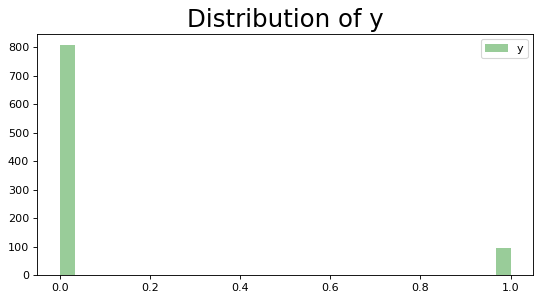

07-14 15:10:15 I hypernets.e.compete.py 1521 - ToolBox data memory usage: 0.000, free=19.159
07-14 15:10:15 I hypernets.e.compete.py 1536 - fit_transform data_adaption with columns: ['id', 'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']


## Data Adaption

### Initliazed parameters

,key,value
0,memory_limit,0.05
1,min_cols,0.3
2,name,data_adaption
3,target,None


07-14 15:10:15 I hypernets.e.compete.py 272 - data_adaption original data memory usage:0.000, limit: 0.958GB


### Fitted parameters

,key,value
0,input_features,"[id, age, job, marital, education, default, ba..."
1,selected_features,"[id, age, job, marital, education, default, ba..."
2,unselected_features,[]


### Elapsed

* 0.005 seconds

07-14 15:10:15 I hypernets.e.compete.py 1521 - ToolBox data memory usage: 0.000, free=19.158
07-14 15:10:15 I hypernets.e.compete.py 1536 - fit_transform data_clean with columns: ['id', 'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']


## Data Clean

### Initliazed parameters

,key,value
0,cv,True
1,data_cleaner_args,"{'nan_chars': None, 'correct_object_dtype': Tr..."
2,name,data_clean
3,train_test_split_strategy,None


07-14 15:10:15 I hypernets.e.compete.py 524 - data_clean transform train data
07-14 15:10:15 I hypernets.t.data_cleaner.py 233 - replace [inf,-inf] to nan
07-14 15:10:15 I hypernets.t.data_cleaner.py 263 - convert object type to str, ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
07-14 15:10:15 I hypernets.t.data_cleaner.py 326 - drop columns: ['id']
07-14 15:10:15 I hypernets.e.compete.py 573 - data_clean keep 16 columns


### Fitted parameters

,key,value
0,input_features,"[id, age, job, marital, education, default, ba..."
1,selected_features,"[age, job, marital, education, default, balanc..."
2,unselected_features,[id]
3,X_train.shape,"(904, 16)"
4,y_train.shape,"(904,)"
5,X_eval.shape,None
6,y_eval.shape,None
7,X_test.shape,None
8,unselected_reason,{'id': 'idness'}
9,kept/dropped feature count,16/1


### Elapsed

* 0.021 seconds

07-14 15:10:16 I hypernets.e.compete.py 1521 - ToolBox data memory usage: 0.000, free=19.157
07-14 15:10:16 I hypernets.e.compete.py 1536 - fit_transform space_searching with columns: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']


## Space Searching

### Initliazed parameters

,key,value
0,cv,True
1,name,space_searching
2,num_folds,3


07-14 15:10:16 I hypernets.c.meta_learner.py 22 - Initialize Meta Learner: dataset_id:b9d71789bdb77d7d6d20dc13d07700b4


#### Experiment Settings:

HyperGBM(searcher=EvolutionSearcher(space_fn=GeneralSearchSpaceGenerator(kwargs=None, n_estimators=200, verbose=1), population_size=30, sample_size=10, regularized=True, optimize_direction='max', random_state=RandomState(MT19937) at 0x7F2637CD6C40), callbacks=[EarlyStoppingCallback(max_no_improvement_trials=10, mode='max', time_limit=3599.973243713379), NotebookCallback(), ProgressiveCallback(), FitCrossValidationCallback()], task='binary', discriminator=OncePercentileDiscriminator(percentile=50, history=TrialHistory(direction='max'), optimize_direction='max'))

,X,y,X_eval,y_eval,cv,num_folds,max_trials,fit_kwargs
0,"(904, 16)","(904,)",None,None,True,3,3,"(verbose, skip_if_file)"


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,3,0.893805,2,0.896018,4.672655,3,3


#### Best Trial:

key,value
signature,54e57250e8fc4f6e738335628f7175d5
vectors,"[1, 0, 1, 3, 2, 2, 0, 3, 4]"
0-estimator_options.hp_or,1
1-numeric_imputer_0.strategy,mean
2-numeric_or_scaler_0.hp_or,1
3-Module_XGBoostEstimator_1.max_depth,10
4-Module_XGBoostEstimator_1.learning_rate,0.5
5-Module_XGBoostEstimator_1.gamma,1.5
6-Module_XGBoostEstimator_1.min_child_weight,1
7-Module_XGBoostEstimator_1.reg_alpha,1


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,2,0.896018,1.314810,"[1, 0, 1, 3, 2, 2, 0, 3, 4]"
1,3,0.893805,1.352264,"[0, 1, 3, 0, 20, 2, 3, 4, 1]"
2,1,0.835177,1.695598,"[0, 1, 1, 1, 170, 2, 3, 4, 4]"


search:   0%|          | 0/3 [00:00<?, ?it/s]

fit_cross_validation:   0%|          | 0/3 [00:00<?, ?it/s]

07-14 15:10:16 I hypergbm.hyper_gbm.py 246 - transforming the train set, memory free:19.151
07-14 15:10:16 I hypergbm.hyper_gbm.py 229 - transform
07-14 15:10:16 I hypergbm.hyper_gbm.py 233 - taken 0.0069277286529541016s
07-14 15:10:16 I hypergbm.hyper_gbm.py 280 - fold 0 started, memory free:19.151
07-14 15:10:16 I hypergbm.hyper_gbm.py 311 - fold 0 fitting estimator
07-14 15:10:16 I hypergbm.hyper_gbm.py 320 - fold 0 predict x_val_fold
07-14 15:10:16 I hypergbm.hyper_gbm.py 327 - fold 0 get scores
07-14 15:10:16 I hypergbm.hyper_gbm.py 338 - fold 0 done with 0.5029354095458984 seconds
07-14 15:10:16 I hypergbm.hyper_gbm.py 280 - fold 1 started, memory free:19.145
07-14 15:10:17 I hypergbm.hyper_gbm.py 311 - fold 1 fitting estimator
07-14 15:10:17 I hypergbm.hyper_gbm.py 320 - fold 1 predict x_val_fold
07-14 15:10:17 I hypergbm.hyper_gbm.py 327 - fold 1 get scores
07-14 15:10:17 I hypergbm.hyper_gbm.py 338 - fold 1 done with 0.4685633182525635 seconds
07-14 15:10:17 I hypergbm.hyper_g

### Fitted parameters

,key,value
0,input_features,"[age, job, marital, education, default, balanc..."
1,best_reward,0.896018
2,history,"TrialHistory(direction='max', size=3, succeede..."


### Elapsed

* 4.692 seconds

07-14 15:10:20 I hypernets.e.compete.py 1521 - ToolBox data memory usage: 0.000, free=19.131
07-14 15:10:20 I hypernets.e.compete.py 1536 - fit_transform final_ensemble with columns: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']


## Final Ensemble

### Initliazed parameters

,key,value
0,ensemble_size,20
1,name,final_ensemble
2,scorer,make_scorer(accuracy_score)


07-14 15:10:20 I hypernets.t.e.base_ensemble.py 72 - get predictions, need_fit=False
07-14 15:10:20 I hypernets.t.e.base_ensemble.py 75 - fit_predictions
07-14 15:10:23 I hypernets.e.compete.py 1227 - built estimator: GreedyEnsemble(weight=[1.0, 0.0, 0.0], scores=[0.9413716814159292, 0.9413716814159292, 0.9413716814159292, 0.9413716814159292, 0.9413716814159292, 0.9413716814159292, 0.9413716814159292, 0.9413716814159292, 0.9413716814159292, 0.9413716814159292, 0.9413716814159292, 0.9413716814159292, 0.9413716814159292, 0.9413716814159292, 0.9413716814159292, 0.9413716814159292, 0.9413716814159292, 0.9413716814159292, 0.9413716814159292, 0.9413716814159292])


### Fitted parameters

,0,1
0,weights,"[1.0, 0.0, 0.0]"
1,scores,"[0.9413716814159292, 0.9413716814159292, 0.941..."
2,best_stack,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,hits,{0: 20}
4,ensemble_size,20


### Elapsed

* 2.490 seconds

07-14 15:10:23 I hypernets.e.compete.py 1610 - trained experiment pipeline: ['data_clean', 'estimator']


Pipeline(steps=[('data_clean',
                 DataCleanStep(cv=True,
                               data_cleaner_args={'correct_object_dtype': True,
                                                  'drop_columns': None,
                                                  'drop_constant_columns': True,
                                                  'drop_duplicated_columns': False,
                                                  'drop_idness_columns': True,
                                                  'drop_label_nan_rows': True,
                                                  'int_convert_to': 'float',
                                                  'nan_chars': None,
                                                  'reduce_mem_usage': False,
                                                  'reserve_columns': None},
                               name='data_clean')),
                ('est...
                 GreedyEnsemble(weight=[1.0, 0.0, 0.0], scores=[0.9413716814159292, 0.9413716814159292, 0.9413716814159292, 0.9413716814159292, 0.9413716814159292, 0.9413716814159292, 0.9413716814159292, 0.9413716814159292, 0.9413716814159292, 0.9413716814159292, 0.9413716814159292, 0.9413716814159292, 0.9413716814159292, 0.9413716814159292, 0.9413716814159292, 0.9413716814159292, 0.9413716814159292, 0.9413716814159292, 0.9413716814159292, 0.9413716814159292]))])

In [2]:
df = dsutils.load_bank()
df_train, df_test = train_test_split(df, test_size=0.8, random_state=42)

experiment = make_experiment(df_train, target='y',
                             max_trials=3,
                             log_level='info',
                             verbose=1,
                             random_state=1234,
                             skip_if_file='/tmp/skip.tag')

pipeline = experiment.run()
pipeline

查看集成模型

### Calculate shap value
选择第一个模型来解释

In [8]:
estimators = pipeline.steps[-1][1].estimators
estimators

[HyperGBMEstimator(task=binary, reward_metric=accuracy, cv=True,
 data_pipeline: DataFrameMapper(df_out=True,
                 df_out_dtype_transforms=[(ColumnSelector(include:['object']),
                                           'int')],
                 features=[(ColumnSelector(include:['object', 'category', 'bool']),
                            Pipeline(steps=[('categorical_imputer_0',
                                             SafeSimpleImputer(strategy='constant')),
                                            ('categorical_label_encoder_0',
                                             MultiLabelEncoder())])),
                           (ColumnSelector(include:number, exclude:timedelta),
                            Pipeline(steps=[('numeric_imputer_0',
                                             FloatOutputImputer()),
                                            ('numeric_log_standard_scaler_0',
                                             LogStandardScaler())]))],
           

In [11]:
estimators

[HyperGBMEstimator(task=binary, reward_metric=accuracy, cv=True,
 data_pipeline: DataFrameMapper(df_out=True,
                 df_out_dtype_transforms=[(ColumnSelector(include:['object']),
                                           'int')],
                 features=[(ColumnSelector(include:['object', 'category', 'bool']),
                            Pipeline(steps=[('categorical_imputer_0',
                                             SafeSimpleImputer(strategy='constant')),
                                            ('categorical_label_encoder_0',
                                             MultiLabelEncoder())])),
                           (ColumnSelector(include:number, exclude:timedelta),
                            Pipeline(steps=[('numeric_imputer_0',
                                             FloatOutputImputer()),
                                            ('numeric_log_standard_scaler_0',
                                             LogStandardScaler())]))],
           

In [4]:
# 越界会有提示，这个不用担心
# 生成的数据长度也是对的

In [13]:
from hypergbm.experiment import PipelineSHAPExplainer
explainer = PipelineSHAPExplainer(pipeline, model_indexes=[0, 1])
explainer

07-14 15:13:50 W hypergbm.experiment.py 330 - Index of 1 is None 


In [14]:
values_list = explainer(df_test)

07-14 15:14:05 I hypernets.t.data_cleaner.py 233 - replace [inf,-inf] to nan
07-14 15:14:05 I hypernets.t.data_cleaner.py 263 - convert object type to str, ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
07-14 15:14:05 I hypernets.t.data_cleaner.py 326 - drop columns: ['id', 'y']


In [16]:
len(values_list)

2

In [19]:
values_list[0]

[.values =
 array([[-0.04601034, -0.05447808, -0.00120919, ...,  0.01986399,
          0.00437103, -0.03113517],
        [-0.03627361, -0.04703718, -0.01184322, ..., -0.20124876,
          0.3268084 ,  0.16695866],
        [ 0.04598682, -0.04122588, -0.0009389 , ..., -0.05542494,
          0.01025445, -0.02277257],
        ...,
        [-0.13013886, -0.07107649, -0.00536875, ...,  0.05891076,
          0.07599318, -0.02277257],
        [-0.11863654, -0.07270975, -0.00120919, ..., -0.05542494,
          0.00142192, -0.02277257],
        [-0.03792273, -0.06318229, -0.00307575, ...,  0.07540397,
         -0.00507646, -0.04115214]], dtype=float32)
 
 .base_values =
 array([-2.422018, -2.422018, -2.422018, ..., -2.422018, -2.422018,
        -2.422018], dtype=float32)
 
 .data =
 array([[2, 1, 1, ..., 0.9227767055365647, -0.41714648990965064,
         -0.33354435418667516],
        [4, 1, 2, ..., -0.24764172568969045, -0.38322851238034505,
         2.6290440252355154],
        [9, 1, 1, ...,

### Use the waterfall chart to interpret a prediction result 

In [22]:
df_test.iloc[1]

id                  800
age                  50
job          management
marital         married
education      tertiary
default              no
balance            2881
housing              no
loan                 no
contact        cellular
day                   5
month               aug
duration            510
campaign              2
pdays                 2
previous              5
poutcome          other
y                    no
Name: 800, dtype: object

This sample is predicted to be positive，waterfall chart shows that the biggest contribution is `duration=510`, in other words, long talk time is an important factor that leads to the success of customers

In [29]:
shap_values = values_list[0][0]

In [32]:
len(shap_values)

3617

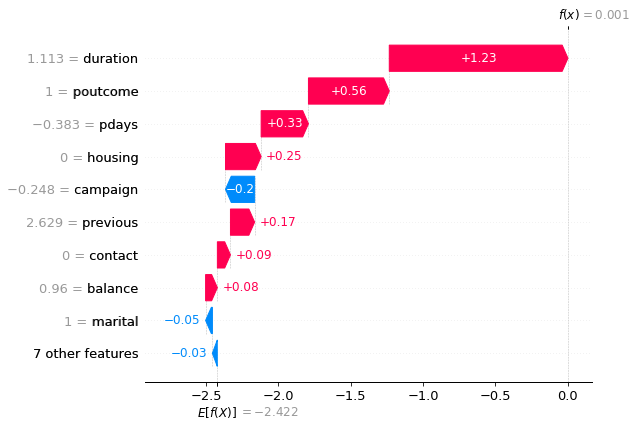

In [33]:
import shap
shap.plots.waterfall(shap_values[1])

#### Use beeswarm chart to get an overview of which features are most important for a model

This figure indicates that the most important feature is `duration`. Lhe long call duration has a strong impact on the positive prediction by the model.

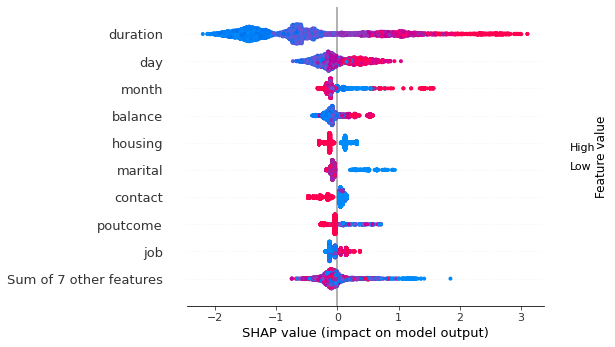

In [34]:
shap.plots.beeswarm(shap_values)

### Understand the interaction effects between 2 features using dependence scatter 

Customers with long talk time and small interval between campaigns are more likely to succeed in marketing

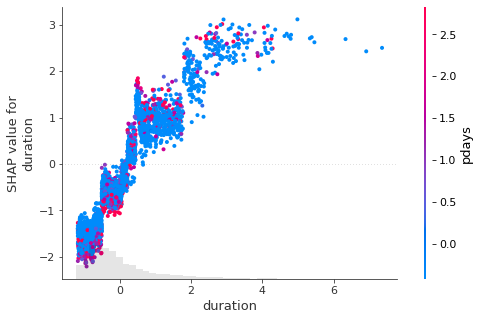

In [35]:
shap.plots.scatter(shap_values[:, "duration"], color=shap_values[:, "pdays"], show=True)